# General config

In [5]:
import nibabel as nib
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
subject_names = ["JW_NOSTIC2", 
                 "JW_NOSTIC3", 
                 "NOSTIC_VTA4", 
                 "NOSTIC_VTA_N6", 
                 "WT_VTA_N7", # channel
                 "NOSTIC_VTA_N8", 
                 "WT_VTA_N10", # channel
                 "NOSTIC_WT_N11", 
                 "JW_NOSTIC_VTA15", # channel
                 "JW_NOSTIC_VTA16", # channel
                ]

subject_NOT_USED = ["NOSTIC_VTA3", 
                    "JW_NOSTIC_VTA10",]

print(len(subject_names))

curSubject = subject_names[0] # 7
print(f"Current subject: {curSubject}")

10
Current subject: JW_NOSTIC2


In [4]:
input_dir = f"../Cell_counting_results/{curSubject}/"
print(f"Input directory: {input_dir}")

Input directory: ../Cell_counting_results/JW_NOSTIC2/


In [35]:
# Get data from the cursubject
curSubject_path = input_dir + "cell_density_downsampled.nii.gz"
curSubject_nii = nib.load(curSubject_path)
affine = curSubject_nii.affine
header = curSubject_nii.header

# Extract voxel dimensions from the header
voxel_sizes = header.get_zooms()
print(f"Voxel sizes: {voxel_sizes} mm")
curSubject_data = curSubject_nii.get_fdata()
print(f"Cell density size: {curSubject_data.shape}")

# Import atlas
atlas_path = f"../Cell_counting_results/JW_NOSTIC2/atlas_downsampled_asymm.nii.gz"
atlas_nii = nib.load(atlas_path)
atlas_data = atlas_nii.get_fdata()
print(f"Atlas size: {atlas_data.shape}")

Voxel sizes: (0.5, 1.0, 0.5) mm
Cell density size: (43, 41, 43)
Atlas size: (43, 41, 43)


In [36]:
inds = range(17, 28) # 17-27, the indices of slices we are interested in
curSubject_subset = curSubject_data[:, inds, :]
atlas_subset = atlas_data[:, inds, :]
print(f"Cell density subset size: {curSubject_subset.shape}")
print(f"Atlas subset size: {atlas_subset.shape}")

Cell density subset size: (43, 11, 43)
Atlas subset size: (43, 11, 43)


In [37]:
curSubject_subset.shape

(43, 11, 43)

Text(0.5, 1.0, 'JW_NOSTIC2 cell density, slice 5')

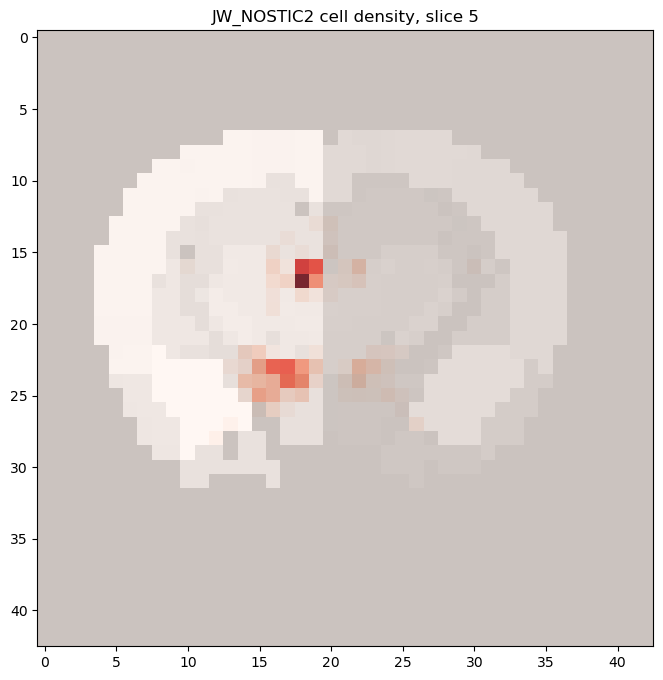

In [38]:
slice_index = 5
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(np.rot90(atlas_subset[:, slice_index, :]), cmap='gray', alpha=1)
ax.imshow(np.rot90(curSubject_subset[:, slice_index, :]), cmap='Reds', alpha=0.8)
# plt.colorbar()
ax.set_title(f"{curSubject} cell density, slice {slice_index}")

In [ ]:
ROIs = np.unique(atlas_subset).astype(int)
print(ROIs)

[   0    1    3   10   33   34   36   37   38   40   42   43   47   48
   50   51   52   53   55   58   59   61   62   63   66   67   68   69
   71   76   78   79   82   83   93   94   95   96   97   98   99  100
  108  109  110  112  113  114  115  141  143  145  146  150  151  152
  153  157  164  180  181  182  183  184  187  188  189  192  193  195
  196  197  198  199  200  204  205  206  208  210  211  213  214  215
  216  219  221  222  227  228  229  230  231  232  233  235  236  239
  240  242  246  247  248  249  254  255  257  260  266  267  270  281
  283  284  285  286  291  293  294  295  297  298  405  406  408  409
  410  411  412  413  414  416  417  418  420  422  423  424  425  427
  429  430  432  433  436  442  443  444  448  500  501  502  521  523
  530  553  554  556  557  558  560  562  563  567  568  570  571  572
  573  574  575  578  579  580  581  582  587  589  591  596  598  599
  602  603  613  614  615  616  617  618  619  620  628  629  630  632
  633 